# 윤서벗
타이타닉 데이터(data/test.csv)에서, PClass 가 1 인 데이터만 뽑아서
이들의 성별,나이(x)에 따른 생존여부(y) 디시전트리를 만든 후, 이를 아래와 같이 예측하기

In [1]:
import pandas as pd

df = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [2]:
# df2.loc[영어점수가 100점 이상인 것, '수학']
# df2.loc[행,열]
df = df.loc[df['Pclass'] == 1]
df_test = df_test.loc[df_test['Pclass'] == 1]

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [3]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
11,903,1,"Jones, Mr. Charles Cresson",male,46.0,0,0,694,26.0000,NaN,S
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
20,912,1,"Rothschild, Mr. Martin",male,55.0,1,0,PC 17603,59.4000,NaN,C
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
403,1295,1,"Carrau, Mr. Jose Pedro",male,17.0,0,0,113059,47.1000,NaN,S
404,1296,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C
407,1299,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q


In [4]:
df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            30
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          40
Embarked        2
dtype: int64

In [5]:
df_test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age             9
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          27
Embarked        0
dtype: int64

In [6]:
# 성별
df.loc[df['Sex'] == 'male', 'Sex'] = 0
df.loc[df['Sex'] == 'female', 'Sex'] = 1

df_test.loc[df_test['Sex'] == 'male', 'Sex'] = 0
df_test.loc[df_test['Sex'] == 'female', 'Sex'] = 1

# 나이
df['Age'] = df['Age'].fillna(df['Age'].mean())
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())


df.loc[df['Age']<10, 'Age'] = 0
df.loc[(df['Age'] >= 10) & (df['Age'] < 20), 'Age'] = 1
df.loc[(df['Age'] >= 20) & (df['Age'] < 30), 'Age'] = 2
df.loc[(df['Age'] >= 30) & (df['Age'] < 40), 'Age'] = 3
df.loc[(df['Age'] >= 40) & (df['Age'] < 50), 'Age'] = 4
df.loc[df['Age'] >= 50, 'Age'] = 5

df_test.loc[df_test['Age']<10, 'Age'] = 0
df_test.loc[(df_test['Age'] >= 10) & (df_test['Age'] < 20), 'Age'] = 1
df_test.loc[(df_test['Age'] >= 20) & (df_test['Age'] < 30), 'Age'] = 2
df_test.loc[(df_test['Age'] >= 30) & (df_test['Age'] < 40), 'Age'] = 3
df_test.loc[(df_test['Age'] >= 40) & (df_test['Age'] < 50), 'Age'] = 4
df_test.loc[df_test['Age'] >= 50, 'Age'] = 5

In [7]:
df_test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          27
Embarked        0
dtype: int64

In [8]:
x_train = df[['Sex', 'Age']]
x_test = df_test[['Sex', 'Age']]
y_train = df['Survived']

x_train

,Sex,Age
1,1,3.0
3,1,3.0
6,0,5.0
11,1,5.0
23,0,2.0
...,...,...
871,1,4.0
872,0,3.0
879,1,5.0
887,1,1.0


In [9]:
y_train

1      1
3      1
6      0
11     1
23     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 216, dtype: int64

In [10]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier() # 초기화
tree.fit(x_train, y_train) # 학습

tree.score(x_train, y_train) # 성능 확인

0.7916666666666666

In [11]:
prediction = tree.predict(x_test)
prediction

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1],
      dtype=int64)

# 혜원 벗(Week3&4)

In [12]:
df = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

# 나이 빈칸
df['Age'] = df['Age'].fillna(df['Age'].mean())
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())

# 1나이
df.loc[df['Age']<10, 'Age'] = 0
df.loc[(df['Age'] >= 10) & (df['Age'] < 20), 'Age'] = 1
df.loc[(df['Age'] >= 20) & (df['Age'] < 30), 'Age'] = 2
df.loc[(df['Age'] >= 30) & (df['Age'] < 40), 'Age'] = 3
df.loc[(df['Age'] >= 40) & (df['Age'] < 50), 'Age'] = 4
df.loc[df['Age'] >= 50, 'Age'] = 5

df_test.loc[df_test['Age']<10, 'Age'] = 0
df_test.loc[(df_test['Age'] >= 10) & (df_test['Age'] < 20), 'Age'] = 1
df_test.loc[(df_test['Age'] >= 20) & (df_test['Age'] < 30), 'Age'] = 2
df_test.loc[(df_test['Age'] >= 30) & (df_test['Age'] < 40), 'Age'] = 3
df_test.loc[(df_test['Age'] >= 40) & (df_test['Age'] < 50), 'Age'] = 4
df_test.loc[df_test['Age'] >= 50, 'Age'] = 5

# 2 Embarked 빈칸 채우기
df['Embarked'] = df['Embarked'].fillna('S')
df_test['Embarked'] = df_test['Embarked'].fillna('S')

# 3 성별
df.loc[df['Sex'] == 'male', 'Sex'] = 0
df.loc[df['Sex'] == 'female', 'Sex'] = 1

df_test.loc[df_test['Sex'] == 'male', 'Sex'] = 0
df_test.loc[df_test['Sex'] == 'female', 'Sex'] = 1

# 4 embarked
df.loc[df['Embarked'] == 'S', 'Embarked'] = 0
df.loc[df['Embarked'] == 'C', 'Embarked'] = 1
df.loc[df['Embarked'] == 'Q', 'Embarked'] = 2

df_test.loc[df_test['Embarked'] == 'S', 'Embarked'] = 0
df_test.loc[df_test['Embarked'] == 'C', 'Embarked'] = 1
df_test.loc[df_test['Embarked'] == 'Q', 'Embarked'] = 2

# 5 이름
#train
df.loc[ df['Name'].str.contains('Mr\.'), 'Name' ] = 'Mr'
df.loc[ df['Name'].str.contains('Mrs\.'), 'Name' ] = 'Mrs'
df.loc[ df['Name'].str.contains('Miss\.'), 'Name' ] = 'Miss'

df['Name'] = df['Name'].map({
    'Mr': 0,
    'Mrs': 1,
    'Miss': 2
})
df['Name'] = df['Name'].fillna(3)

#test
df_test.loc[ df_test['Name'].str.contains('Mr\.'), 'Name' ] = 'Mr'
df_test.loc[ df_test['Name'].str.contains('Mrs\.'), 'Name' ] = 'Mrs'
df_test.loc[ df_test['Name'].str.contains('Miss\.'), 'Name' ] = 'Miss'

df_test['Name'] = df_test['Name'].map({
    'Mr': 0,
    'Mrs': 1,
    'Miss': 2
})
df_test['Name'] = df_test['Name'].fillna(3)

# 6 fare 빈칸 채우기
df['Fare'] = df['Fare'].fillna( df.groupby('Name')['Fare'].transform('mean') )
df_test['Fare'] = df_test['Fare'].fillna( df_test.groupby('Name')['Fare'].transform('mean') )

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [14]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [15]:
x_train = df[['Name', 'Sex', 'Age', 'Fare', 'Embarked']]
x_test = df_test[['Name', 'Sex', 'Age', 'Fare', 'Embarked']]
y_train = df['Survived']

x_train

,Name,Sex,Age,Fare,Embarked
0,0.0,0,2.0,7.2500,0
1,1.0,1,3.0,71.2833,1
2,2.0,1,2.0,7.9250,0
3,1.0,1,3.0,53.1000,0
4,0.0,0,3.0,8.0500,0
...,...,...,...,...,...
886,3.0,0,2.0,13.0000,0
887,2.0,1,1.0,30.0000,0
888,2.0,1,2.0,23.4500,0
889,0.0,0,2.0,30.0000,1


In [16]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier() # 초기화
tree.fit(x_train, y_train) # 학습

print(' DecisionTreeClassifier - training set accuracy:', tree.score(x_train, y_train))

 DecisionTreeClassifier - training set accuracy: 0.9438832772166106


In [17]:
x_test

,Name,Sex,Age,Fare,Embarked
0,0.0,0,3.0,7.8292,2
1,1.0,1,4.0,7.0000,0
2,0.0,0,5.0,9.6875,2
3,0.0,0,2.0,8.6625,0
4,1.0,1,2.0,12.2875,0
...,...,...,...,...,...
413,0.0,0,3.0,8.0500,0
414,3.0,1,3.0,108.9000,1
415,0.0,0,3.0,7.2500,0
416,0.0,0,3.0,8.0500,0


In [18]:
prediction = tree.predict(x_test)
print('DecisionTreeClassifier - test의 prediction\n', prediction)


DecisionTreeClassifier - test의 prediction
 [1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0
 0 0 1 0 1 0 0 1 0 0 1]


In [19]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier() # 초기화
forest.fit(x_train, y_train) # 학습
print('RandomForestClassifier - training set accuracy:', forest.score(x_train, y_train))
print()
prediction = tree.predict(x_test)
print('RandomForestClassifier - test의 prediction\n', prediction)

RandomForestClassifier - training set accuracy: 0.9438832772166106

RandomForestClassifier - test의 prediction
 [1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0
 0 0 1 0 1 0 0 1 0 0 1]


# 지연벗
print(df_test.isnull().sum())를 사용하여 빈 공백을 확인하면 Cabin에 327개의 공백이 있는 것을 확인할
수 있습니다. Cabin을 객실의 알파벳만 남기고 대체한 후 빈 공간은 제일 많은 알파벳으로 변경해주세요.
Ex) C85는 C로 변경

In [20]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [21]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0.0,0,2.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,1.0,1,3.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,2.0,1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,1.0,1,3.0,1,0,113803,53.1000,C123,0
4,5,0,3,0.0,0,3.0,0,0,373450,8.0500,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,3.0,0,2.0,0,0,211536,13.0000,NaN,0
887,888,1,1,2.0,1,1.0,0,0,112053,30.0000,B42,0
888,889,0,3,2.0,1,2.0,1,2,W./C. 6607,23.4500,NaN,0
889,890,1,1,0.0,0,2.0,0,0,111369,30.0000,C148,1


# 미경벗

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

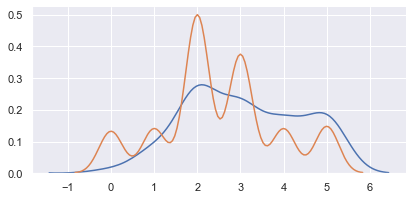

In [23]:
facet = sns.FacetGrid(df, hue = 'Pclass', aspect = 2)
facet.map(sns.kdeplot, 'Age')
facet.add_legend()
plt.show()
# sns.plot(data = df, x = 'Age', y = 'Survived', hue = 'Pclass', aspect= 3)   # 가로가 세로의 3배/ hue : 성별로 구분
# sns.catplot(data=df, x = 'Age', hue = 'Pclass', kind = 'count', aspect = 4)